In [133]:
import pandas as pd

In [134]:
ngnix = pd.read_csv('nginx.csv')

In [135]:
apache = pd.read_csv('apache.csv')
apache

,time_local,remote_addr,method,request,http_version,status,body_bytes_sent,http_referer,http_user_agent
0,29/Sep/2021:19:05:57 +0900,103.150.161.171,POST,/en/alerts/notifications,1.1,400,143,https://test001.threatidr.com/en/dashboard/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,29/Sep/2021:19:05:48 +0900,103.150.161.171,GET,/static/build/img/favicon-40dbb4ce31bb98782905...,1.1,200,15406,https://test001.threatidr.com/en/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,29/Sep/2021:19:05:48 +0900,103.150.161.171,GET,/static/build/img/page-img/login-sidebar.png,1.1,304,0,https://test001.threatidr.com/static/build/mai...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,29/Sep/2021:19:05:47 +0900,103.150.161.171,GET,/static/build/main_js.bundle-38680b0270726d98f...,1.1,304,0,https://test001.threatidr.com/en/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,29/Sep/2021:19:05:47 +0900,103.150.161.171,GET,/static/build/main_css.bundle-2c51c6fba66fd2a7...,1.1,200,257936,https://test001.threatidr.com/en/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
...,...,...,...,...,...,...,...,...,...
267230,15/Jul/2021:16:06:35 +0900,103.150.161.171,GET,/static/build/img/country-flags/jp-25ac778acd9...,1.1,200,546,https://test001.threatidr.com/en/dashboard/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
267231,15/Jul/2021:16:06:35 +0900,103.150.161.171,GET,/static/build/img/icon/sidebar/Discover-957a3c...,1.1,200,1798,https://test001.threatidr.com/en/dashboard/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
267232,15/Jul/2021:16:06:35 +0900,103.150.161.171,GET,/static/build/img/icon/sidebar/Settings-active...,1.1,200,1341,https://test001.threatidr.com/en/dashboard/,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
267233,15/Jul/2021:16:06:35 +0900,103.150.161.171,GET,/,1.1,302,215,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [ ]:
apache =apache[['status','body_bytes_sent','method','request','http_version','time_local']]

In [19]:
apache['http_version']= apache['http_version'].astype(str)
apache['Request'] = apache[['request', 'http_version']].agg('/HTTP/'.join, axis=1)
apache['Request'] =apache[['method', 'Request']].agg(' '.join, axis=1)
del apache ['request']
del apache['http_version']
del apache['method']

In [30]:
df = apache.rename(columns={'status': 'Status', 'body_bytes_sent':'b', 
                        'Request':'Request', 'time_local': 'Time'})
df

,Status,b,Time,Request
0,400,143,29/Sep/2021:19:05:57 +0900,POST /en/alerts/notifications/HTTP/1.1
1,200,15406,29/Sep/2021:19:05:48 +0900,GET /static/build/img/favicon-40dbb4ce31bb9878...
2,304,0,29/Sep/2021:19:05:48 +0900,GET /static/build/img/page-img/login-sidebar.p...
3,304,0,29/Sep/2021:19:05:47 +0900,GET /static/build/main_js.bundle-38680b0270726...
4,200,257936,29/Sep/2021:19:05:47 +0900,GET /static/build/main_css.bundle-2c51c6fba66f...
...,...,...,...,...
267230,200,546,15/Jul/2021:16:06:35 +0900,GET /static/build/img/country-flags/jp-25ac778...
267231,200,1798,15/Jul/2021:16:06:35 +0900,GET /static/build/img/icon/sidebar/Discover-95...
267232,200,1341,15/Jul/2021:16:06:35 +0900,GET /static/build/img/icon/sidebar/Settings-ac...
267233,302,215,15/Jul/2021:16:06:35 +0900,GET //HTTP/1.1


In [31]:
df.index = pd.to_datetime(df.pop('Time'),format = '%d/%b/%Y:%H:%M:%S +%f')

In [32]:
df['Status'] = df['Status'].astype('int')

In [33]:
def dash2nan(x):
    if x == '-':
        x = np.nan
    else:
        x = float(x)/1048576.
    
    return x
df['b'] = df['b'].apply(dash2nan)

Analysis

Let's graph the data to visualize what is happening.

First let's increase the graph size

In [34]:
from pylab import *
rcParams['figure.figsize'] = 10, 5 # width, height in inches



Now let's graph the requests hitting the web server. 10t will use a 10 minute interval size, so each point on the graph shows the number of requestes in a 10 minute window.


In [37]:
%matplotlib inline

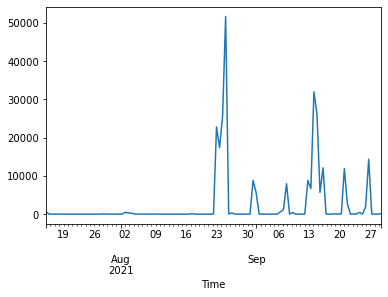

In [44]:
df_s = df['Status'].resample('1000t').agg('count')
df_s.plot()

In [45]:
df['Status'].value_counts()

200    261327
428      2934
304      1287
500      1185
404       170
400       162
302        94
499        71
301         5
Name: Status, dtype: int64

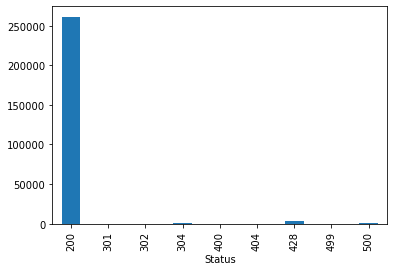

In [51]:
grouped_status = df.groupby('Status')
grouped_status.size().plot(kind='bar')

In [78]:
t_span = '5000t'
df_200 = df['Status'][df['Status'] == 200].resample(t_span).agg('count')
df_500 = df['Status'][df['Status'] == 500].resample(t_span).agg('count')
df_499 = df['Status'][df['Status'] == 499].resample(t_span).agg('count')
df_304 = df['Status'][df['Status'] == 304].resample(t_span).agg('count')
df_302 = df['Status'][df['Status'] == 302].resample(t_span).agg('count')
df_404 = df['Status'][df['Status'] == 404].resample(t_span).agg('count')
df_428 = df['Status'][df['Status'] == 428].resample(t_span).agg('count')
df_301 = df['Status'][df['Status'] == 301].resample(t_span).agg('count')
df_400 = df['Status'][df['Status'] == 400].resample(t_span).agg('count')


status_df = pd.DataFrame({'OK': df_200, 
                       'Internal Server': df_500, 
                       'Client Closed': df_499, 
                       'Not Modified': df_304, 
                       'Found': df_302, 
                       'Not Found': df_404,
                       'Precondition Failed': df_428,
                       'Moved Permenantely': df_301,
                       'Bad Request': df_400})

In [79]:
status_df.fillna(0, inplace=True)
status_df[0:5]

,OK,Internal Server,Client Closed,Not Modified,Found,Not Found,Precondition Failed,Moved Permenantely,Bad Request
Time,,,,,,,,,
2021-07-15 00:00:00,257.0,0.0,0.0,351.0,4.0,0.0,0.0,0.0,0.0
2021-07-18 00:00:00,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2021-07-18 11:20:00,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2021-07-21 11:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-21 22:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


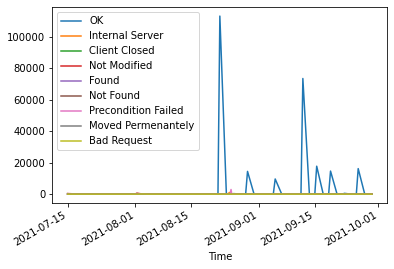

In [80]:
status_df.plot()
legend()

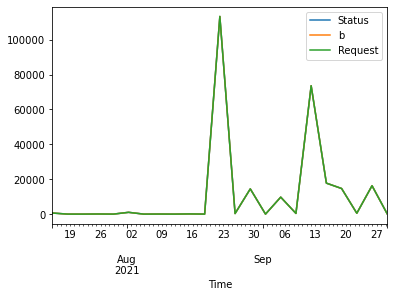

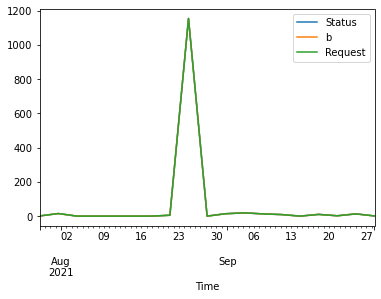

In [84]:
success_df = df[df['Status'].isin([200, 304, 302, 404, 301, 401, 403, 206, 444, 400, 408, 405])].resample(t_span).agg('count')
fail_df = df[df['Status'].isin([502, 499, 504, 500, 444])].resample(t_span).agg('count')
success_df.plot(label="Success")
fail_df.plot(label="Failure")
legend()

In [85]:
dynamic_df = df[df['Request'].str.contains(r'^GET /(static|favicon.ico)') == False]
dynamic_df[0:10]

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Status,b,Request
Time,,,
2021-09-29 19:05:57.090,400,0.000136,POST /en/alerts/notifications/HTTP/1.1
2021-09-29 19:05:47.090,200,0.004508,GET /en//HTTP/1.1
2021-09-29 19:03:38.090,200,0.004508,GET /en//HTTP/1.1
2021-09-29 18:57:22.090,200,0.004508,GET /en//HTTP/1.1
2021-09-29 18:57:22.090,302,0.000205,GET //HTTP/1.1
2021-09-29 18:56:41.090,400,0.000136,POST /en/alerts/notifications/HTTP/1.1
2021-09-29 18:37:04.090,400,0.000136,POST /en/alerts/notifications/HTTP/1.1
2021-09-29 18:33:38.090,200,0.004508,GET /en//HTTP/1.1
2021-09-29 18:33:38.090,302,0.000205,GET //HTTP/1.1


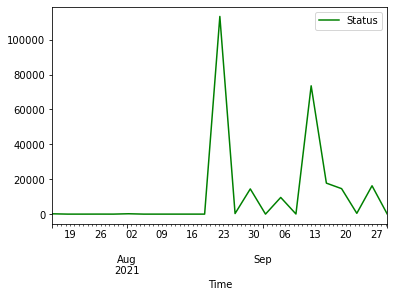

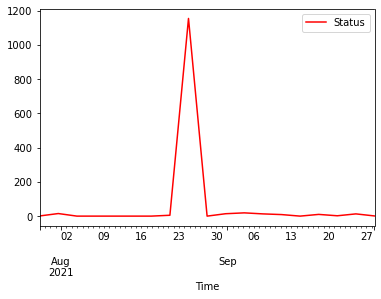

In [101]:
success_df = dynamic_df[dynamic_df['Status'].isin([200, 304, 302, 301, 401])].resample(t_span).agg('count')
success_df = success_df [['Status']]
fail_df = dynamic_df[dynamic_df['Status'].isin([502, 499, 504, 500])].resample(t_span).agg('count')
fail_df = fail_df [['Status']]
success_df.plot(label="Success", color="g")
fail_df.plot(label="Failure", color="r")
legend()

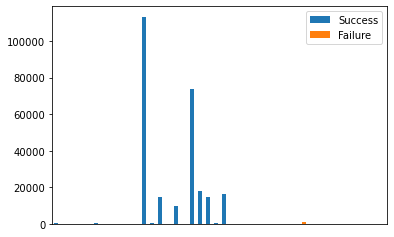

In [123]:
responses_df = pd.DataFrame.from_dict({'Success': success_df.Status, 
                          'Failure': fail_df.Status,
                          },orient = 'index')
responses_df = responses_df.T
responses_df.plot(kind="bar", stacked=True, xticks=())

In [126]:
dynamic_df['Request'].value_counts().head(40)

GET /pgadmin4/dashboard/dashboard_stats/1/16384?chart_names=session_stats,tps_stats,ti_stats,to_stats,bio_stats/HTTP/1.1    203262
GET /pgadmin4/sqleditor/status/4811155/HTTP/1.1                                                                              26885
GET /pgadmin4/sqleditor/status/608565/HTTP/1.1                                                                                7827
GET /pgadmin4/sqleditor/status/5912397/HTTP/1.1                                                                               6451
GET /pgadmin4/sqleditor/status/3545984/HTTP/1.1                                                                               2849
GET /pgadmin4/sqleditor/status/8481395/HTTP/1.1                                                                               2162
GET /pgadmin4/sqleditor/status/4677609/HTTP/1.1                                                                               1855
GET /pgadmin4/sqleditor/status/4613348/HTTP/1.1                                    

In [131]:
dynamic_df[dynamic_df['Request'].str.contains('GET')]['Status'].value_counts()

200    257969
428      2934
500      1156
302        70
499        64
404        64
304        42
400         6
301         4
Name: Status, dtype: int64